# Assignment #4

This assignment can be completed by adding code to this notebook for each question.

Turn in a completed notebook, renamed as

`assignment4_<username>.ipynb`

with your `<username>` being your DataVU login name (e.g., mine is `kgoebber`) to `/archive/courses/met290/assignment4` via the Linux computing system.

**DUE DATE: 22 October 2021 at 4 pm.**

Prior to turning in your notebook, please cleanup and comment your code for each problem. Be sure that your output is self-describing

## Question #1
The world population has been growing for a long time (a log plot for the y-axis would be useful here), but not evenly among different countries. You are given the task of analyzing this dataset by a UN Council working group on Environmental Sustaibability. They have tasked you with both some numeric analysis as well as providing some graphical representations of the data. The data you were given comes from the UN and contains the population data for a number of countries from 1950-2020 in the thousands (i.e., the total population can be found by multiplying the values by 1000). Here are the lists of tasks that you are required to perform:
* Create a multipanel plot of the timeseries of the total population for all of the countries by continent (e.g., Americas, Europe, Asia, Oceania) on different panels, making sure to label the figure with all approrpriate elements and save your figure as `<username>_HW4_plot1.png`
* Write code to determine the percent change in population for each five year period (note: you'll have one less column of data for percent differences than for the original dataset)
* Plot the percent change for the US, Germany, China, and India individually as a bar plot, making sure to label the figure with all appropriate elements and save your figure as `<username>_HW4_plot2_<country>.png`
* Write code to determine and print out which five countries had the highest population growth by raw increase in population between 1950 and 2020 and report how much their population grew.
* Write code to determine and print out which five countries had the lowest population growth by raw increase in population between 1950 and 2020 and report how much their population grew.

In addition to the code needed to perform the above tasks, you must include comments wtihin your code that describe what the code is doing. This doesn't have to be done for each line of code, but rather for blocks of code that are related to accomplishing a task.

**Notes:**
* When printing out results, make sure that it is clear and can easily be interpreted by someone with no coding experience.
* When reading in a file, use the absolute path to the file on the Linux system
* Sorting is a common asepect of coding and there are a few functions from Numpy that might be helpful including `np.sort` and `np.argsort`; the difficulty here is that you'll have country names in a separate array from your data, which make it slightly more difficult to keep everything aligned.
* To calculate the percent change, subtract the new year from the old year and divide by the old year
* For a better plot of all of the countries population through time, use the `semilogy` method for plotting instead of just `plot`
* Counties by Continent
   - Americas: USA, Canada, Mexico, Argentina, Brazil, Costa Rica
   - Europe: Germany, United Kingdom, Norway
   - Asia: China, India
   - Africa: Namibia, South Africa, Nigeria, Kenya, Tanzania, Central African Republic, Egypt
   - Oceania: Australia, New Zealand
Data file is located in `/archive/courses/met290` and is called `world_population_data_1950_2020.csv`

Example Text Output (fake data):

```
The top five population growth countries:
 1. Legoland - population grew by 1000000
 2. Linuxland - population grew by 984329
 3. Pythonland - population grew by 67392
 .
 .
 .

```

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pop_data = np.loadtxt('world_population_data_1950_2020.csv', skiprows=1, usecols = list(range(1,16)), delimiter=',')
pop_countries = np.loadtxt('world_population_data_1950_2020.csv', skiprows=1, usecols = 0, delimiter=',', dtype='str')

In [6]:
pop_countries

array(['Kenya', 'United Republic of Tanzania', 'Central African Republic',
       'Egypt', 'Namibia', 'South Africa', 'Nigeria', 'China', 'India',
       'Norway', 'United Kingdom', 'Germany', 'Costa Rica', 'Mexico',
       'Argentina', 'Brazil', 'Canada', 'United States of America',
       'Australia', 'New Zealand'], dtype='<U27')

In [20]:
africa = pop_countries[:7]
africa_pop = pop_data[:7]
asia = pop_countries[7:9]
asia_pop = pop_data[7:9]
europe = pop_countries[9:12]
europe_pop = pop_data[9:12]
americas = pop_countries[12:18]
americas_pop = pop_data[12:18]
oceania = pop_countries[18:]
oceania_pop = pop_data[18:]

In [8]:
pct_change = (pop_data[:, 1:] - pop_data[:, :-1])/pop_data[:, :-1]

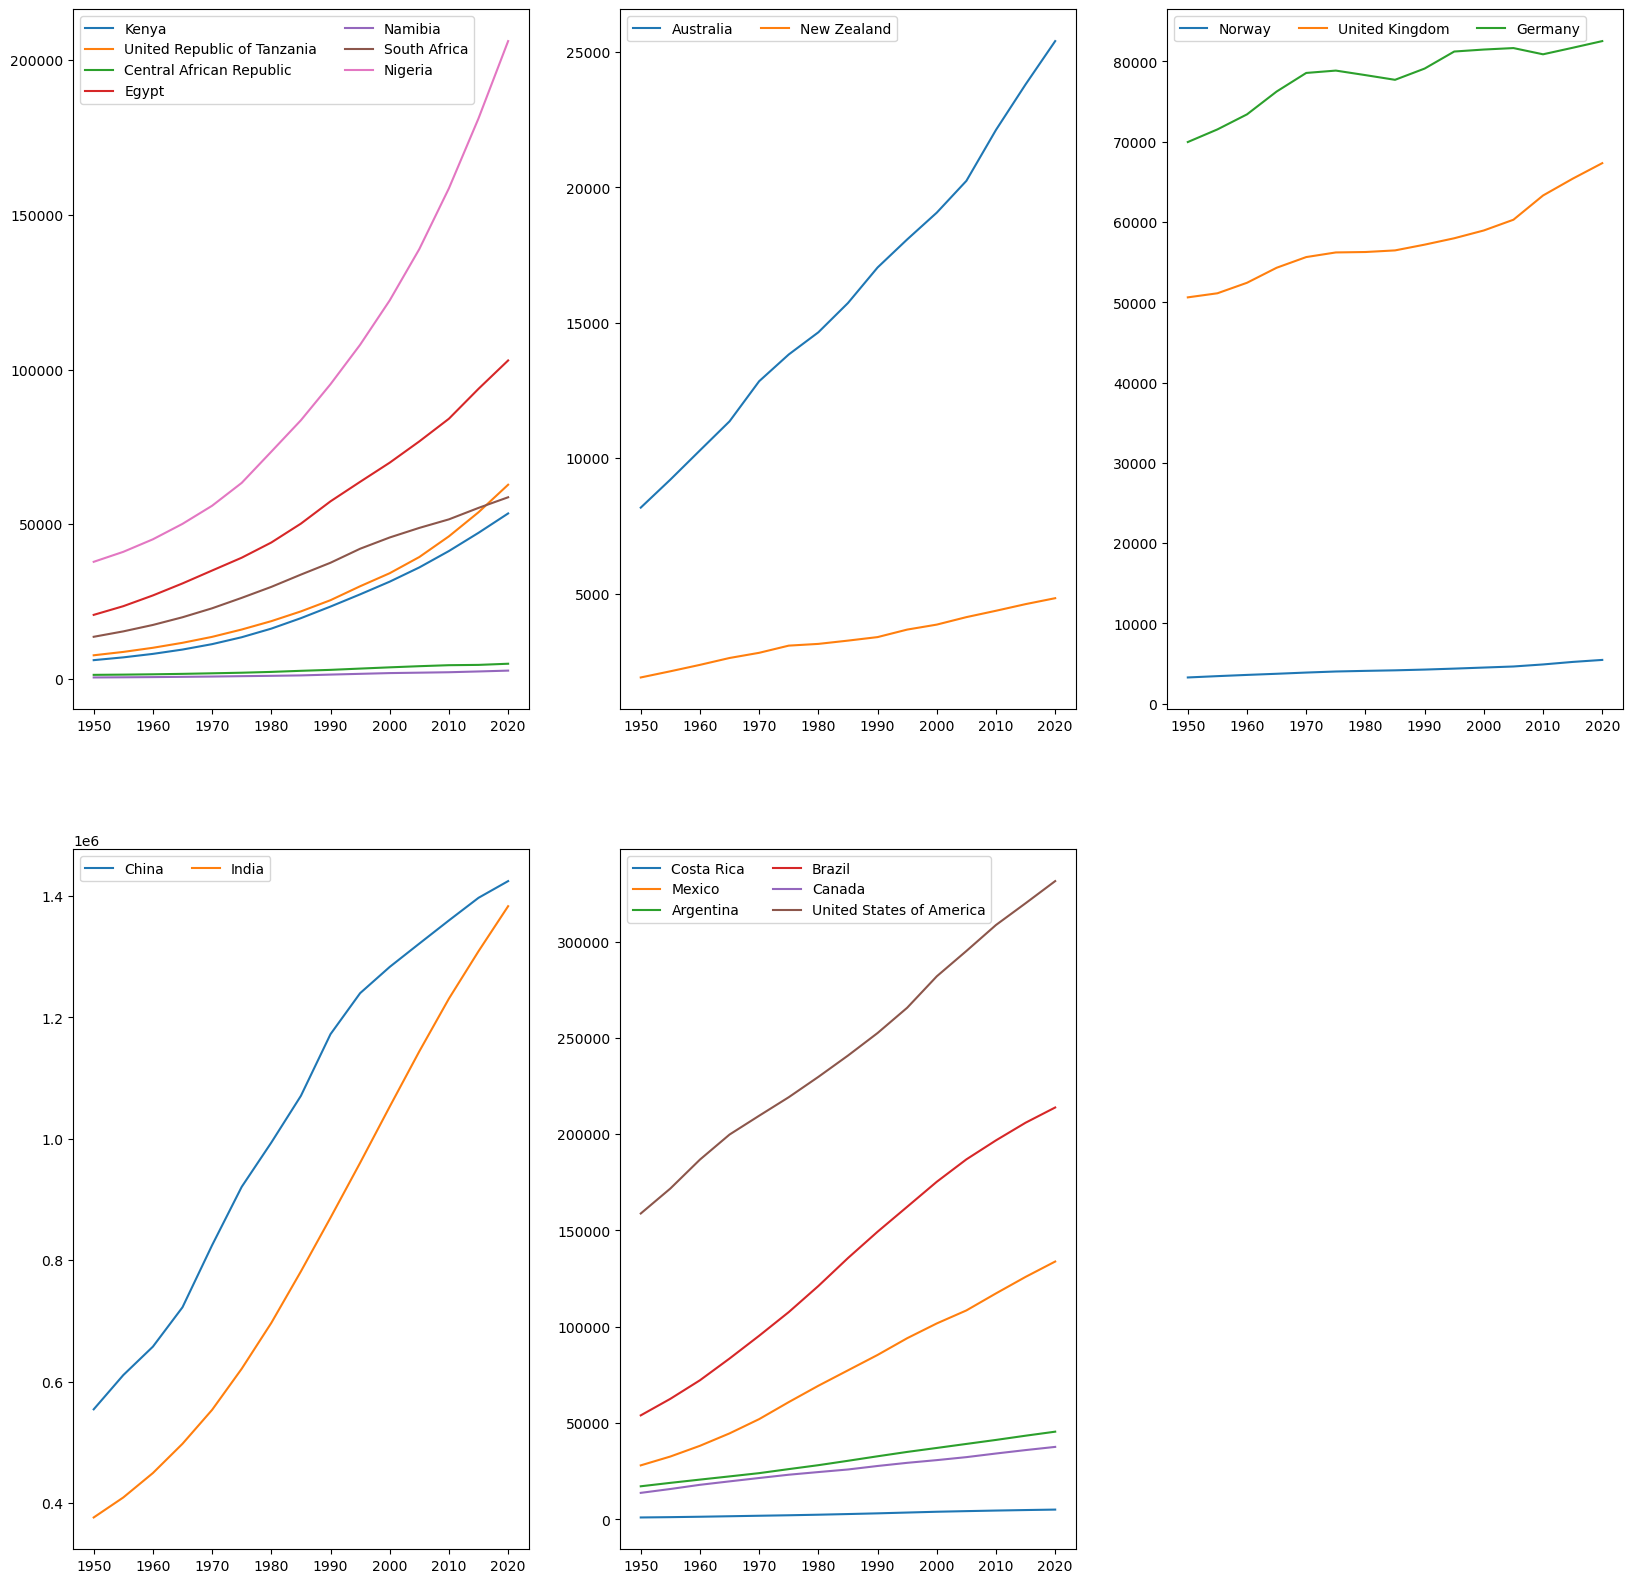

In [9]:
fig = plt.figure(1, figsize=(20, 20))


years = np.arange(1950, 2021, 5)

ax1 = plt.subplot(231)
for country in africa:
    ax1.plot(years, pop_data[pop_countries == country][0], label=country)   
ax1.legend(ncol=2)

ax2 = plt.subplot(234)
for country in asia:
    ax2.plot(years, pop_data[pop_countries == country][0], label=country)
ax2.legend(ncol=4)

ax3 = plt.subplot(232)
for country in oceania:
    ax3.plot(years, pop_data[pop_countries == country][0], label=country)
ax3.legend(ncol=4)

ax4 = plt.subplot(233)
for country in europe:
    ax4.plot(years, pop_data[pop_countries == country][0], label=country)
ax4.legend(ncol=4)

ax4 = plt.subplot(235)
for country in americas:
    ax4.plot(years, pop_data[pop_countries == country][0], label=country)
ax4.legend(ncol=2)

plt.show()

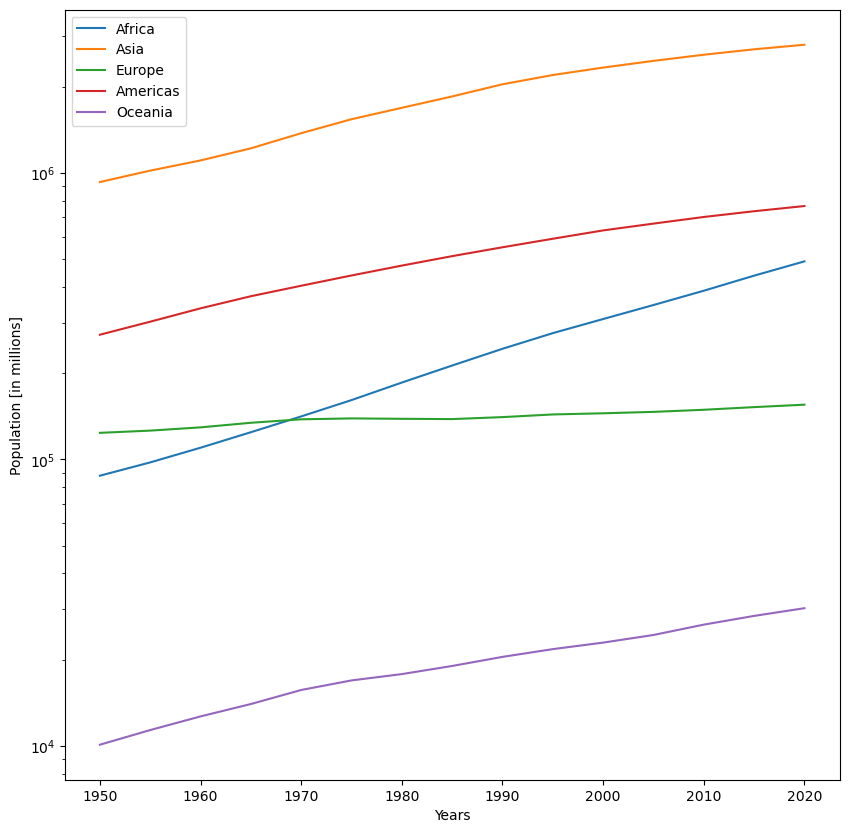

In [30]:
fig = plt.figure(1, figsize=(10, 10))


years = np.arange(1950, 2021, 5)

ax1 = plt.subplot(111)
ax1.semilogy(years, africa_pop.sum(axis=0), label='Africa')
ax1.semilogy(years, asia_pop.sum(axis=0), label='Asia')
ax1.semilogy(years, europe_pop.sum(axis=0), label='Europe')
ax1.semilogy(years, americas_pop.sum(axis=0), label='Americas')
ax1.semilogy(years, oceania_pop.sum(axis=0), label='Oceania')

ax1.set_ylabel('Population [in millions]')
ax1.set_xlabel('Years')

plt.legend()

plt.show()

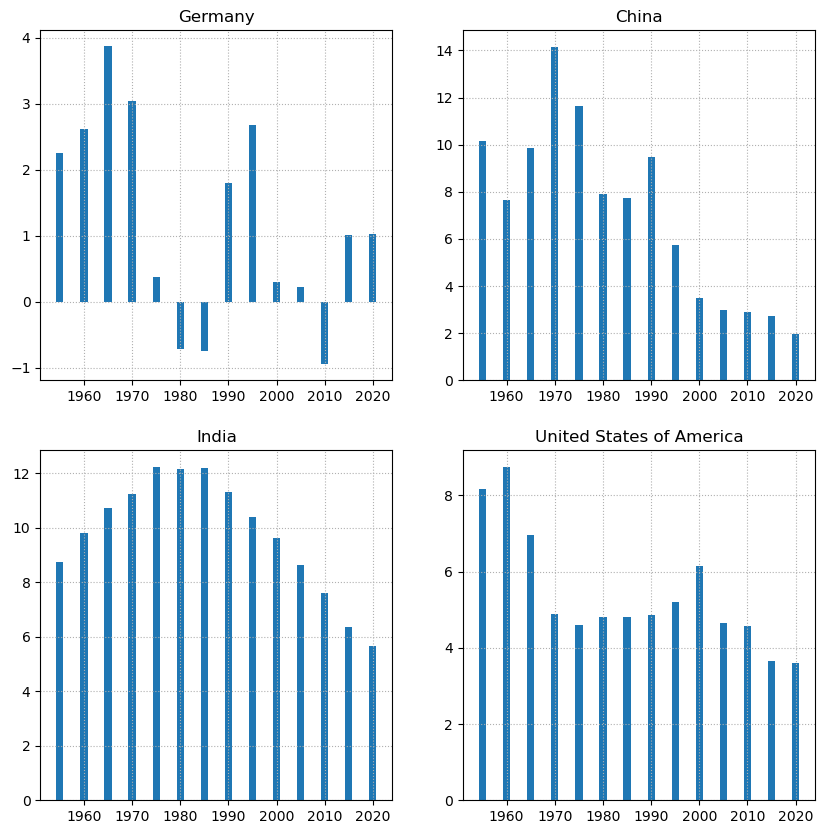

In [40]:
fig = plt.figure(3, figsize=(10, 10))
for i, country in enumerate(['Germany', 'China', 'India', 'United States of America']):
    ax = plt.subplot(221+i)
    ax.bar(years[1:], pct_change[pop_countries == country][0]*100, width=1.5)
    ax.set_title(country)
    ax.grid(ls='dotted')
plt.show()

In [12]:
growth = pop_data[:, -1] - pop_data[:, 0]
top_growth_ind = np.argsort(growth)[-5:][::-1]
print(pop_countries[top_growth_ind])
print(growth[top_growth_ind])

low_growth_ind = np.argsort(growth)[:5]
print(pop_countries[low_growth_ind])
print(growth[low_growth_ind])

['India' 'China' 'United States of America' 'Nigeria' 'Brazil']
[1006873.  870129.  172628.  168293.  159888.]
['Norway' 'Namibia' 'New Zealand' 'Central African Republic' 'Costa Rica']
[2185. 2212. 2926. 3594. 4085.]


## Question #2
You've done such great work for the UN that they have asked you to also study the variability of sea ice extent over the Northern Hemisphere for the past five years. You are tasked with generating an analysis figure that plots the most recent five years of sea ice extent data (e.g., January 2016 - Dec 2020) in 1e6 km^2 along with the 10%, 90%, and average sea ice extent between 1981-2010. To your benefit you have been given two separate files: 1) containing the daily sea ice extent from 1978-current and 2) the average sea extent by day for the period 1981-2010. The second file also contains other statistical values related to the sea ice extent over the period 1981-2010.

**Notes:**
* Each year should be plotted as its own line within the plot and labeled accordingly
* The leap year days have been removed from the dataset for convenience
* Use the 2020 dates for labelling the x-axis (bonus brownie points if you make them more generic)
* To earn full credit you must go beyond the basics of plotting lines by using color, linestyles, and filling between lines (for extra bonus brownie points) to make the best possible graphic you can. Use the Matplotlib documentation and example gallery to help you add high quality elements to your figure.

Data files are located in `/archive/courses/met290` and are called `sea_ice_extence_modified.csv` and `avg_sea_ice_extent_modified.csv`.

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

sea_ice_days = np.loadtxt('sea_ice_extent_daily.gsfs.nasateam.1978-2021.csv', skiprows=1, usecols=[0], delimiter=',', dtype=np.datetime64)
sea_ice_dates = sea_ice_days.astype('datetime64[ms]').astype('O')
sea_ice_data = np.loadtxt('sea_ice_extent_daily.gsfs.nasateam.1978-2021.csv', skiprows=1, usecols=[3], delimiter=',')

In [2]:
avg_sea_ice_data = np.loadtxt('avg_sea_ice_extent_modified.csv', skiprows=2, usecols=[1, 3, 7], delimiter=',')

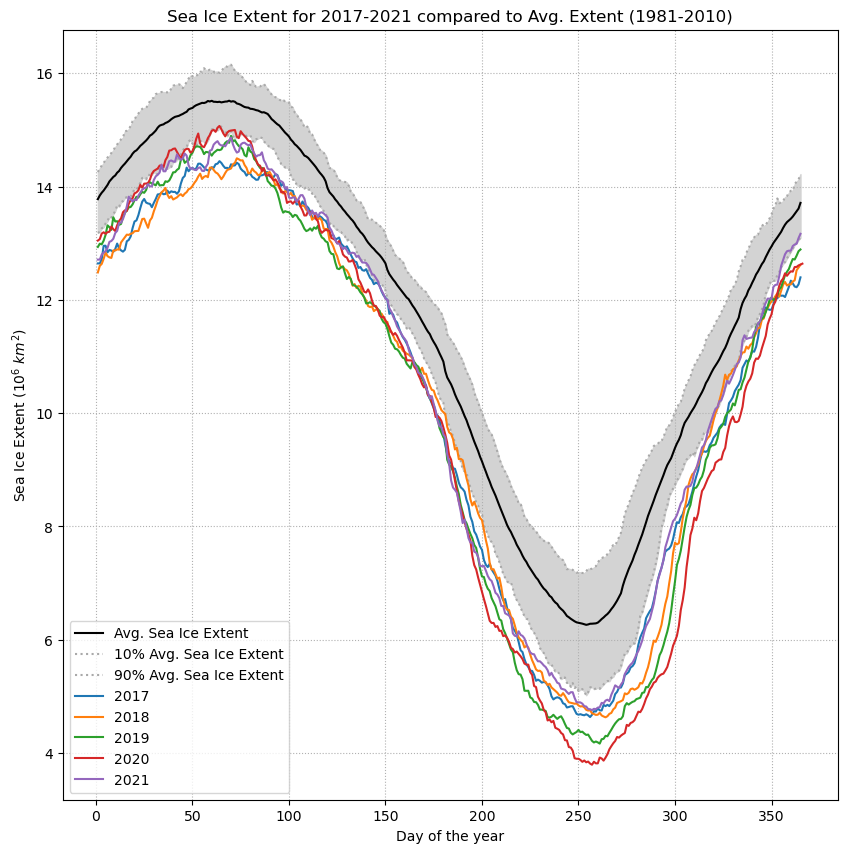

In [3]:
ndays = np.arange(1, avg_sea_ice_data.shape[0]+1)

plt.figure(2, figsize=(10, 10))
ax = plt.subplot(111)

ax.plot(np.arange(1, avg_sea_ice_data.shape[0]+1), avg_sea_ice_data[:, 0], color='black', label='Avg. Sea Ice Extent')
ax.plot(np.arange(1, avg_sea_ice_data.shape[0]+1), avg_sea_ice_data[:, 1], color='darkgrey', ls='dotted', label='10% Avg. Sea Ice Extent')
ax.plot(np.arange(1, avg_sea_ice_data.shape[0]+1), avg_sea_ice_data[:, 2], color='darkgrey', ls='dotted', label='90% Avg. Sea Ice Extent')
ax.fill_between(np.arange(1, avg_sea_ice_data.shape[0]+1), avg_sea_ice_data[:, 1], avg_sea_ice_data[:, 2], color='lightgrey')

for year in range(2017, 2022):
    start = datetime(year, 1, 1)
    stop = datetime(year, 12, 31)
    plot_data = sea_ice_data[(sea_ice_dates>=start)&(sea_ice_dates<=stop)]
    ax.plot(np.arange(1, plot_data.shape[0]+1), plot_data*1e-6, label=year)

ax.grid(ls='dotted')
ax.legend()

ax.set_ylabel('Sea Ice Extent ($10^6$ $km^2$)')
ax.set_xlabel('Day of the year')
ax.set_title('Sea Ice Extent for 2017-2021 compared to Avg. Extent (1981-2010)')
plt.show()